In [1]:
import numpy as np
from os.path import dirname, abspath, join as pjoin
from Corrfunc.theory.DD import DD
from Corrfunc.io import read_catalog
from Corrfunc.utils import convert_3d_counts_to_cf
from Corrfunc.mocks import *
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import glob, time 

from astropy.io import fits as fits
from astropy.table import Table, vstack
from astropy import constants as const
from astropy import units as u
from astropy.table import QTable

import healpy as hp
import math

import sys
sys.path.append('/global/homes/l/lbigwood/LSS/py')
import LSS
import LSS.SV3
import LSS.SV3.cattools as cattools

from desitarget.targets import desi_mask, bgs_mask, mws_mask 
from desitarget.geomask import get_imaging_maskbits 

In [24]:
#keeps crashing!

to_grab=glob.glob('/global/cfs/cdirs/desi/target/catalogs/dr9/1.1.1/targets/main/resolve/bright/targets-bright-hp-*.fits') 

# very good practice to apply sorted, otherwise the file ordering will be random 	and non-repeatable.  
to_grab = sorted(to_grab) 

hp_stack = []

#do timer as takes a while
start = time.time() 

#total number of pixels, not quite sure where this has come from as npix is less than this above 


mmask = 'BGS_TARGET'
ttype = 'BGS_BRIGHT'

#loop through pixels
for i, x in enumerate(to_grab):
    x = fits.open(x) #usecols=['RA', 'DEC', 'TARGETID', 'BGS_TARGET', 'MWS_TARGET'])
    f = x[1].data
    #mask for bgs objects
    
    is_bgs = (f[mmask] & bgs_mask[ttype]) != 0
    #idx = np.arange(len(x))[is_bgs]
    #x = x.iloc[idx] 
    hp_stack.append(f[is_bgs])

    #more timing stuff
    if (i % 20) == 0:
        runtime = (time.time() - start)

        print('Runtime of {:.6f} seconds after {:d} pixels'.format(runtime, i))

    

data_stack = np.concatenate(hp_stack)      
        

data_stack = Table(data_stack)
mask,idx = np.unique(data_stack['TARGETID'],return_index=True)
data_stack = data_stack[idx]


#more timing stuff
runtime = (time.time() - start)
print('\n\nTotal runtime of {:.6f} seconds after {:d} pixels'.format(runtime, npix_todo))



data_stack

In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 41,41,41.  Time taken =   0.078 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.865 secs
ND1 =      1235904 [xmin,ymin,zmin] = [0.000400,0.000100,0.000300], [xmax,ymax,zmax] = [419.999817,419.999512,419.999207]
ND2 =      3707712 [xmin,ymin,zmin] = [0.000066,0.000100,0.000150], [xmax,ymax,zmax] = [419.999973,419.999910,419.999574]
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 41,41,41.  Time taken =   0.071 sec
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 41,41,41.  Time taken =   0.733 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  3.050 secs
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 41,41,41.  Time taken =   0.737 sec
0%.........10%.........20%.........30%........

Trying to find the projected correlation function for mxxl:

In [2]:
#have to use ledger instead

#working with main survey randoms here i.e not sv3
to_grab=glob.glob('/global/cfs/cdirs/desi/survey/ops/surveyops/trunk/mtl/main/bright/mtl-bright-hp-*.ecsv') 

# very good practice to apply sorted, otherwise the file ordering will be random 	and non-repeatable.  
to_grab = sorted(to_grab) 

hp_stack = []

#do timer as takes a while
start = time.time() 

#total number of pixels, not quite sure where this has come from as npix is less than this above 
npix_todo = 200000

mmask = 'BGS_TARGET'
ttype = 'BGS_BRIGHT'

#loop through pixels
for i, x in enumerate(to_grab):
    x = pd.read_csv(x, comment='#', delimiter='\s+')# usecols=['RA', 'DEC', 'TARGETID', 'BGS_TARGET', 'MWS_TARGET'])

    #mask for bgs objects
    is_bgs = (x[mmask] & bgs_mask[ttype]) != 0
    idx = np.arange(len(x))[is_bgs]
    x = x.iloc[idx] 
    hp_stack.append(x)

    #more timing stuff
    if (i % 100) == 0:
        runtime = (time.time() - start)

        print('Runtime of {:.6f} seconds after {:d} pixels'.format(runtime, i))

    if i > npix_todo:
        break
        
# Create a big table from the list of tables.  
data_stack = pd.concat(hp_stack, ignore_index=True)

#unique targets only and put it in right table format
mask,idx = np.unique(data_stack['TARGETID'],return_index=True)
data_stack = data_stack.iloc[idx]
data_stack = Table.from_pandas(data_stack)

#more timing stuff
runtime = (time.time() - start)
print('\n\nTotal runtime of {:.6f} seconds after {:d} pixels'.format(runtime, npix_todo))

data_stack

Runtime of 0.079026 seconds after 0 pixels
Runtime of 5.092527 seconds after 100 pixels
Runtime of 13.394444 seconds after 200 pixels
Runtime of 20.111911 seconds after 300 pixels
Runtime of 29.222286 seconds after 400 pixels
Runtime of 37.222293 seconds after 500 pixels
Runtime of 44.763980 seconds after 600 pixels
Runtime of 53.214504 seconds after 700 pixels
Runtime of 62.521253 seconds after 800 pixels
Runtime of 68.897875 seconds after 900 pixels
Runtime of 75.234223 seconds after 1000 pixels
Runtime of 81.831342 seconds after 1100 pixels
Runtime of 91.303452 seconds after 1200 pixels
Runtime of 100.772280 seconds after 1300 pixels
Runtime of 111.151940 seconds after 1400 pixels
Runtime of 118.917232 seconds after 1500 pixels
Runtime of 127.665787 seconds after 1600 pixels
Runtime of 136.198352 seconds after 1700 pixels
Runtime of 144.005388 seconds after 1800 pixels
Runtime of 150.913178 seconds after 1900 pixels
Runtime of 161.082563 seconds after 2000 pixels
Runtime of 170.7749

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,SCND_TARGET,NUMOBS_MORE,NUMOBS,Z,ZWARN,ZTILEID,Z_QN,IS_QSO_QN,DELTACHI2,TARGET_STATE,TIMESTAMP,VERSION,PRIORITY
float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,float64,int64,int64,float64,int64,float64,str16,str25,str5,int64
59.60086559409994,-68.12683131313392,0.0,0.0,0.0,0.0,39626498281308189,1152921504606846976,131074,0,0.2085393333137383,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.00983139575825,-68.16966639837612,0.0,0.0,0.0,0.0,39626498281308607,1152921504606846976,131074,0,0.024925504385559738,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.01124019929327,-68.16379040745758,0.0,0.0,0.0,0.0,39626498281308610,5764607523034234880,131074,0,0.5879754509121197,575,2100,2,131072,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.067316634746724,-68.1403940503445,0.0,0.0,0.0,0.0,39626498281308675,1152921504606846976,131074,0,0.14655963849075593,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.27687723658043,-68.1477166136955,0.0,0.0,0.0,0.0,39626498285502547,1152921504606846976,131074,0,0.5968644826507952,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.351730827700045,-68.1384524183673,0.0,0.0,0.0,0.0,39626498285502613,1152921504606846976,131074,0,0.3251615652075673,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.35480903565853,-68.15736062454609,0.0,0.0,0.0,0.0,39626498285502619,1152921504606846976,131074,0,0.9714658296060088,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.41502834204189,-68.14758441322456,0.0,0.0,0.0,0.0,39626498285502711,1152921504606912513,131074,0,0.98602725407379,517,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.57191230896668,-68.15293728255374,0.0,0.0,0.0,0.0,39626498285502939,1152921504606846976,131074,0,0.2485029442343407,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100


In [12]:
#angular correlation function for mock data.  

import numpy as np
import Corrfunc
from Corrfunc.mocks.DDtheta_mocks import DDtheta_mocks
from Corrfunc.utils import convert_3d_counts_to_cf


# Read the supplied galaxies on a periodic box
#f = fits.open('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_v0.9.fits')
#mxxl=f[1].data

data_stack_small = data_stack[((data_stack['RA']>180) & (data_stack['RA']<210) & (data_stack['DEC']>30) & (data_stack['DEC']<60))]

RA = data_stack_small['RA']
DEC = data_stack_small['DEC']
N = len(RA)

# Read the supplied randoms catalog
f = fits.open('/global/cfs/cdirs/desi/target/catalogs/dr9/0.49.0/randoms/resolve/randoms-1-0.fits')
random1=f[1].data

random1_small = random1[((random1['RA']>180) & (random1['RA']<210) & (random1['DEC']>30) & (random1['DEC']<60))]

rand_RA = random1_small['RA']
rand_DEC = random1_small['DEC']
rand_N = len(rand_RA)

# Setup the bins
nbins = 10
bins = np.logspace(-3, 1, nbins + 1, base=10)
#bins = np.linspace(0.001, 10.0, nbins + 1)

# Number of threads to use
nthreads = 2

# Auto pair counts in DD
autocorr=1
DD_counts = DDtheta_mocks(autocorr, nthreads, bins,RA, DEC)

# Cross pair counts in DR
autocorr=0
DR_counts = DDtheta_mocks(autocorr, nthreads, bins,RA, DEC,RA2=rand_RA, DEC2=rand_DEC)

# Auto pairs counts in RR
autocorr=1
RR_counts = DDtheta_mocks(autocorr, nthreads, bins, rand_RA, rand_DEC)

# All the pair counts are done, get the angular correlation function
wtheta = convert_3d_counts_to_cf(N, N, rand_N, rand_N, DD_counts, DR_counts,DR_counts, RR_counts)

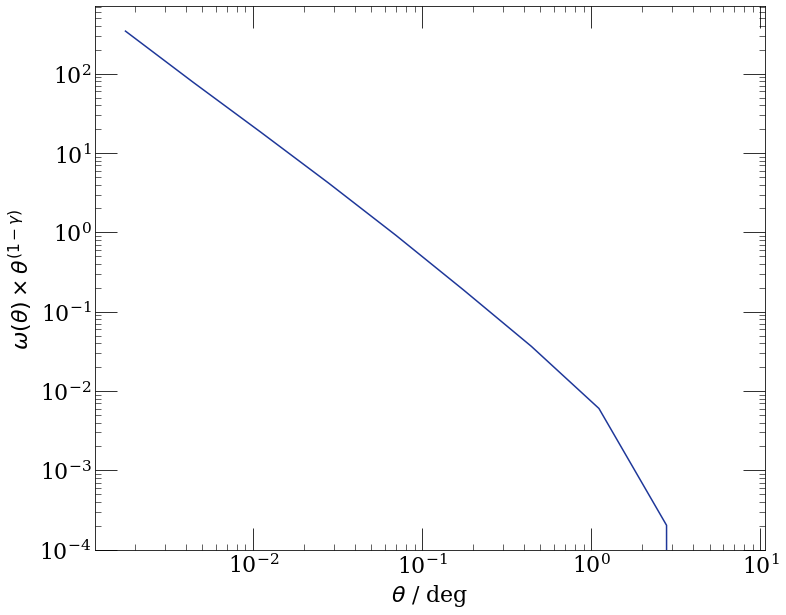

In [14]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)


bins = np.logspace(-3, 1, nbins + 1, base=10)
x_axis = []
for i in range(len(bins)-1):
    x_axis.append((bins[i]+bins[i+1])/2)

y_axis = []
for i in range(len(x_axis)):
    y_axis.append(wtheta[i]*x_axis[i]**(1-1.8))
    
plt.figure(figsize=(12,10))
plt.plot(x_axis, y_axis,color='#1e3799')
plt.xlabel(r'$\theta$ / deg')
plt.ylabel(r'$\omega (\theta)\times \theta^{(1-\gamma)}$')
plt.xscale('log')
plt.yscale('log')
plt.savefig('corrfunc.png',bbox_inches='tight')